In [1]:
# #dependencies
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#scraping the url data with pandas into a list (i think?)
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
marsHTML = pd.read_html(url)
marsHTML

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [3]:
#isolating the table data
marsDF = marsHTML[0]
marsDF

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [4]:
#chaning each column into the either datetime, int, float
marsDF['id'] = marsDF['id'].astype(int)
marsDF['terrestrial_date'] = pd.to_datetime(marsDF['terrestrial_date'], format="%Y-%m-%d")
marsDF['sol'] = marsDF['sol'].astype(int)
marsDF['ls'] = marsDF['ls'].astype(int)
marsDF['month'] = marsDF['month'].astype(int)
marsDF['min_temp'] = marsDF['min_temp'].astype(float)
marsDF['pressure'] = marsDF['pressure'].astype(float)

In [5]:
# How many months exist on Mars?
maxMonth = marsDF['month'].max()
print("There are", maxMonth,"months on Mars")

There are 12 months on Mars


In [6]:
#How many Martian days worth of data exist in the scraped dataset?
lenDays = len(marsDF['sol'].unique())
print("There are", lenDays,"Martian days worth of data on this table")

There are 1867 Martian days worth of data on this table


In [7]:
#making a copy of the original dataframe to not change the original
marsDFCopy = marsDF

In [8]:
#getting the mean of every column grouping by month
marsAvgDF = marsDFCopy.groupby('month').mean()
marsAvgDF.head(maxMonth)

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [9]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
#Get the answer by averaging the minimum daily temperature of all the months. 
#Plot the results as a bar chart.

#then find the min and max of the min_temp column
coldTemp = marsAvgDF['min_temp'].min()
warmTemp = marsAvgDF['min_temp'].max()

#getting the index of the min and max from the min_temp column
coldMonth = marsAvgDF['min_temp'].idxmin()
warmMonth = marsAvgDF['min_temp'].idxmax()

#printing out the results
print("The coldest month on average is month", coldMonth,"with a temp of", coldTemp)
print("The coldest month on average is month", warmMonth,"with a temp of", warmTemp)

The coldest month on average is month 3 with a temp of -83.30729166666667
The coldest month on average is month 8 with a temp of -68.38297872340425


Text(0.5, 1.0, 'Minimum Temps')

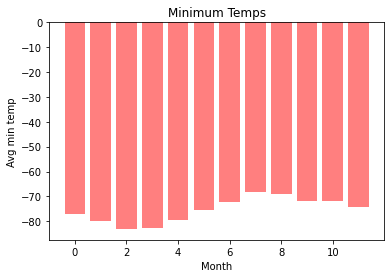

In [10]:
#plotting the months coldest temps
yAxis = marsAvgDF['min_temp']
xAxis = np.arange(len(yAxis))
plt.bar(xAxis, yAxis, color='r', alpha=0.5, align="center")
plt.xlabel('Month')
plt.ylabel('Avg min temp')
plt.title('Minimum Temps')

In [11]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months. 
#Plot the results as a bar chart.

#then find the min and max of the pressure column
lowPressure = marsAvgDF['pressure'].min()
highPressure = marsAvgDF['pressure'].max()

#getting the index of the min and max from the pressure column
lowMonth = marsAvgDF['pressure'].idxmin()
highMonth = marsAvgDF['pressure'].idxmax()

#printing out the results
print("The month with the lowest pressure is ", lowMonth,"with a pressure of", lowPressure)
print("The month with the highest pressure is", highMonth,"with a pressure of", highPressure)

The month with the lowest pressure is  6 with a pressure of 745.0544217687075
The month with the highest pressure is 9 with a pressure of 913.3059701492538


Text(0.5, 1.0, 'Pressure')

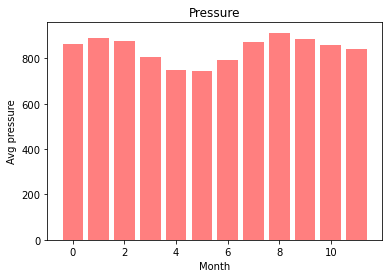

In [12]:
#plotting the months pressure
yAxis1 = marsAvgDF['pressure']
xAxis1 = np.arange(len(yAxis1))
plt.bar(xAxis1, yAxis1, color='r', alpha=0.5, align="center")
plt.xlabel('Month')
plt.ylabel('Avg pressure')
plt.title('Pressure')

In [13]:
type(marsDF['terrestrial_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Text(0.5, 1.0, 'Min Temps by Earth days')

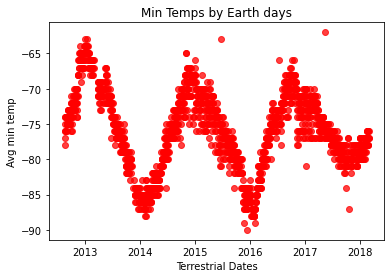

In [14]:
#plotting the min temp using earth dates as the xaxis
yAxis2 = marsDF['min_temp']
xAxis = marsDF['terrestrial_date']
plt.scatter(xAxis, yAxis2, facecolors="red", alpha=0.75)
plt.xlabel('Terrestrial Dates')
plt.ylabel('Avg min temp')
plt.title('Min Temps by Earth days')

In [15]:
marsDF.to_csv('MarsInfo.csv')